# Implementation of Image Compression with Partitioned IFS

Only implemented with black and white images for simplicity

In [1]:
from matplotlib import pyplot as plt
import AffineTransformation as af
import IFS as ifs

In [2]:
#create domain blocks 
#each domain block has 1 ifs
#apply each of the ifss to its domain block

#assume have square domain blocks -> need two points to represent them
#have starting points in each domain block (say corner or smth)
#at each iteration, calculate next point from previous 
#(2d arrays, x[0][0] initial point in 0th domain block, x[0][1] next point in 0th domain block)

#use IFS defined before

In [3]:
class DomainBlock:
    def __init__(self, top_left, bot_right):
        self.top_left = top_left
        self.bot_right = bot_right

class PIFS:
    def __init__(self, name, domain_blocks, ifs_list):
        assert len(domain_blocks) == len(ifs_list)
        
        self.name = name
        self.domain_blocks = domain_blocks
        self.ifs_list = ifs_list

        
    def generate_image(self, n):
        #generates 2d arrays containing x coordinates (resp. y coordinates) for each of the blocks
        x, y = [], []
        
        num_blocks = len(self.domain_blocks)
        block_n = round(n/num_blocks)

        for i in range(num_blocks):
            block_x, block_y = self.ifs_list[i].generate_image(block_n) #total number of points is n * num_blocks

            x.append(block_x)
            y.append(block_y)
        
        return x, y

    def show_image(self, n):
        x, y = self.generate_image(n)
        
        plt.scatter(x, y, s=100/n)
        plt.title(f"{self.name} with {n} points")

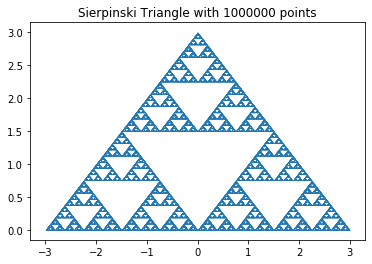

In [4]:
#Sierpinski triangle

#sierpinski transforms for given points
def sierpinski_fns(a, b, c):
    w1 = af.AffineTransformation(1/2, 0, 0, 1/2, a[0]/2, a[1]/2)
    w2 = af.AffineTransformation(1/2, 0, 0, 1/2, b[0]/2, b[1]/2)
    w3 = af.AffineTransformation(1/2, 0, 0, 1/2, c[0]/2, c[1]/2)
    
    return [w1, w2, w3]

#initialisation
probs = [1/3, 1/3, 1/3]

bot_right1 = (1.5, 1.5)
d1 = DomainBlock((-1.5, 3), bot_right1)

fns1 = sierpinski_fns((0, 3), (-1.5, 1.5), (1.5, 1.5))
ifs1 = ifs.IFS("ifs1", fns1, probs, bot_right1)

bot_right2 = (0, 0)
d2 = DomainBlock((-3, 1.5), bot_right2)

fns2 = sierpinski_fns((-1.5, 1.5), (-3, 0), (0, 0))
ifs2 = ifs.IFS("ifs2", fns2, probs, bot_right2)


bot_right3 = (3, 0)
d3 = DomainBlock((0, 1.5), bot_right3)

fns3 = sierpinski_fns((1.5, 1.5), (0, 0), (3, 0))
ifs3 = ifs.IFS("ifs3", fns3, probs, bot_right3)

#creation of pifs
domain_blocks = [d1, d2, d3]
ifs_list = [ifs1, ifs2, ifs3]

pifs = PIFS("Sierpinski Triangle", domain_blocks, ifs_list)

#showing attractor
n = 1000000
pifs.show_image(n)


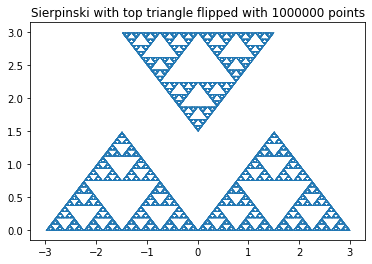

In [7]:
#sierpinski triangle with top triangle flipped (to show domain blocks are independent)
fns1_alt = sierpinski_fns((0, 1.5), (-1.5, 3), (1.5, 3))
ifs1_alt = ifs.IFS("ifs1_alt", fns1_alt, probs, (0, 1.5))

domain_blocks = [d1, d2, d3]
ifs_list_alt = [ifs1_alt, ifs2, ifs3]

pifs_alt = PIFS("Sierpinski with top triangle flipped", domain_blocks, ifs_list_alt)

#show attractor
n = 1000000
pifs_alt.show_image(n)